In [134]:
from lib import *

def getValsPars(df, col):
    out = pd.DataFrame()
    
    for i in df.index:
        val = df.loc[i, col]
        pars = df.loc[i, 'setup']
        pars = pars.split(':')

        nt = pars[0]
        nt = nt.split('=')[1]
        maxd = pars[1]
        maxd = maxd.split('=')[1]
        
        if col != 'RF':
            lr = pars[2]
            lr = lr.split('=')[1]
            line = pd.DataFrame({'nt': [nt], 'maxd': [maxd],'lr': [lr], 'val':[val]})
        else:
            cr = pars[3]
            cr = cr.split('=')[1]    
            line = pd.DataFrame({'nt': [nt], 'maxd': [maxd],'cr': [cr], 'val':[val]})
        
        out = pd.concat([out,line])
        
    out.index = range(out.shape[0])
        
    return out



matplotlib.rcParams.update({'font.size': 13,'font.weight':'normal'})

def assignToCmp(d1, d2, rf = False):
    cmp = pd.DataFrame()
    if rf == True:
        par = 'cr'
    else:
        par = 'lr'
    
    for i in d1.index:
        nt = d1.loc[i, 'nt']
        maxd = d1.loc[i, 'maxd']
        lr = d1.loc[i, par]
        perf1 = d1.loc[i, 'val']
        
        l = d2[(d2['nt'] == nt)*(d2['maxd'] == maxd)*(d2[par] == lr)]
        
        
        if l.shape[0]>1:
            #display(l.head())
            if l.iloc[0][3] == l.iloc[1][3] and l.shape[0] == 2:
                l = l.head(1)
            else:
                print("problem")
        if l.shape[0] == 1:
            perf2 = float(l['val'])            
            if rf:
                l = pd.DataFrame({'nt' :[int(nt)], 'maxd' :[int(maxd)], par: [lr], 
                                  "val1": [perf1], "val2": [perf2] })  
            else:
                l = pd.DataFrame({'nt' :[int(nt)], 'maxd' :[int(maxd)], par: [float(lr)], 
                                  "val1": [perf1], "val2": [perf2] })
            
            cmp = pd.concat([cmp, l])
        
    cmp.index = range(cmp.shape[0])
    return cmp





# AUCs

In [ ]:
aucs = pd.read_csv("zaloha/xgbs/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_dfRA1 = aucs

aucs = pd.read_csv("zaloha/binary_CCreateDfRatioAll/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_dfRA2 = aucs

aucs_dfRA = pd.concat([aucs_dfRA2, aucs_dfRA1])
aucs_dfRA.index = range(aucs_dfRA.shape[0])

aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_sDF = aucs


cmp = assignToCmp(aucs_sDF, aucs_dfRA)
cmp = cmp.sort_values('val1')
cmp.index = range(cmp.shape[0])

In [57]:

aucs = pd.read_csv("zaloha/binary_CCreateDfRatioAll/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_dfRA2 = aucs

[]

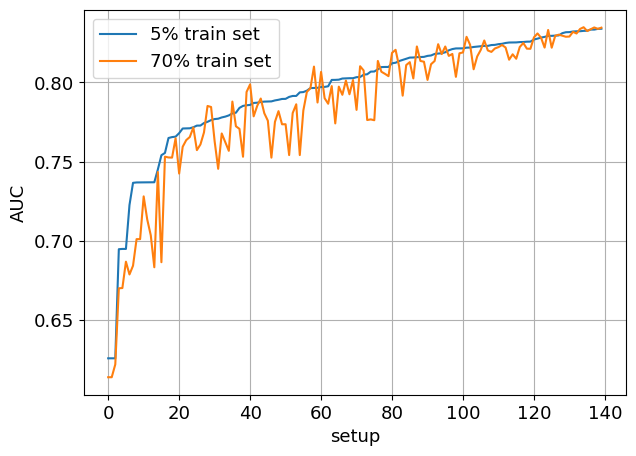

In [133]:
# normally sampled dataset
plt.figure(figsize=(7,5))
plt.plot(cmp.index, cmp['val1'], label = 'sampled')
plt.plot(cmp.index, cmp['val2'], label = 'ratio all')
plt.legend(['5% train set','70% train set'])
plt.xlabel('setup')
plt.ylabel('AUC')
plt.grid(True)
plt.savefig('diplomka_obrazky/70_3_cmp.png',dpi=300)

plt.plot()

# Significances

In [113]:
aucs = pd.read_csv("zaloha/xgbs/significances.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_dfRA1 = aucs

aucs = pd.read_csv("zaloha/binary_CCreateDfRatioAll/significances.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_dfRA2 = aucs

aucs_dfRA = pd.concat([aucs_dfRA2, aucs_dfRA1])
aucs_dfRA.index = range(aucs_dfRA.shape[0])


# sampled dataset to compare with
aucs = pd.read_csv("zaloha/binary_CSampledDatasetAcc/significances.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_sDF = aucs


cmp = assignToCmp(aucs_sDF, aucs_dfRA)
# based on which value to sort, val1 - sampled dataset, val2 - other
cmp = cmp.sort_values('val1')
cmp.index = range(cmp.shape[0])

[]

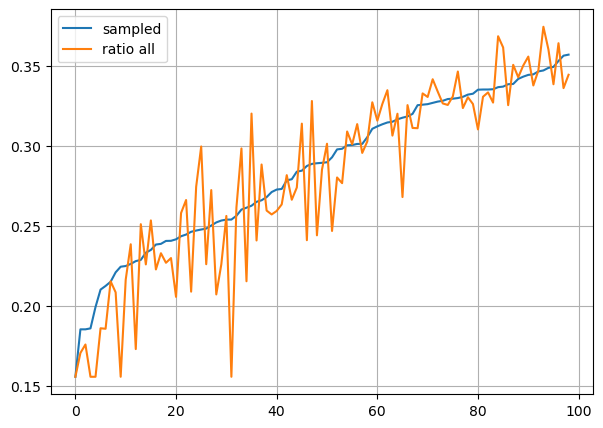

In [114]:
# exp events
plt.figure(figsize=(7,5))
plt.plot(cmp.index, cmp['val1'], label = 'sampled')
plt.plot(cmp.index, cmp['val2'], label = 'ratio all')
plt.legend(['sampled','ratio all'])
plt.grid(True)
plt.plot()

# Compare significances

In [126]:
aucs = pd.read_csv("zaloha/binary_CSampledDatasetAcc/significances.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_sDF1 = aucs

# sampled dataset to compare with
aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/significances.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, 'XGB')
aucs_sDF2 = aucs


cmp = assignToCmp(aucs_sDF1, aucs_sDF2)
# based on which value to sort, val1 - acc, val2 - exp events
cmp = cmp.sort_values('val1')
cmp.index = range(cmp.shape[0])

[]

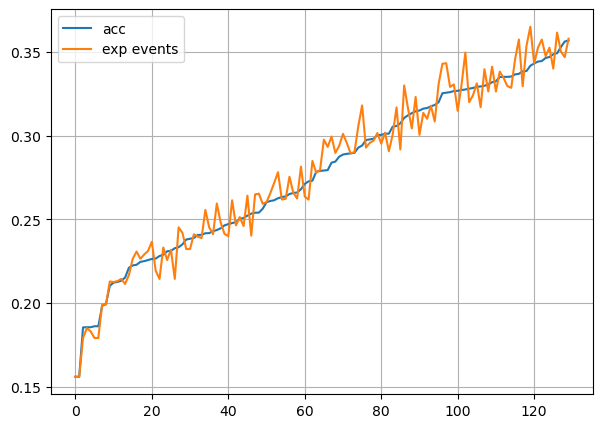

In [127]:
plt.figure(figsize=(7,5))
plt.plot(cmp.index, cmp['val1'], label = 'acc')
plt.plot(cmp.index, cmp['val2'], label = 'exp events')
plt.legend(['acc','exp events'])
plt.grid(True)
plt.plot()

[]

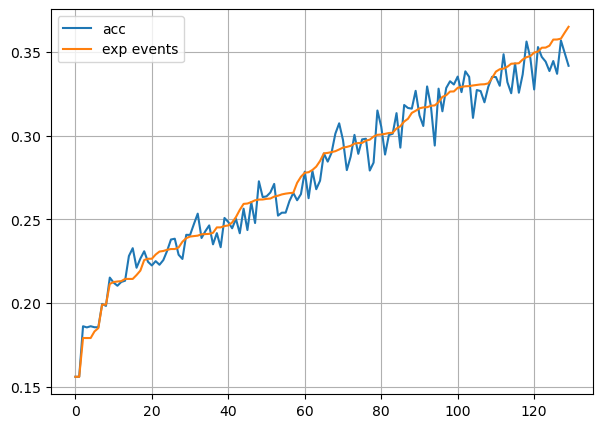

# AUC and significance correlation

In [53]:
aucs = pd.read_csv("zaloha/xgbs/aucs.csv")
sigs = pd.read_csv("zaloha/xgbs/significances.csv")

cmp1 = pd.DataFrame()
cmp1['sig'] = sigs ['XGB']
cmp1['auc'] = aucs ['XGB']


aucs = pd.read_csv("zaloha/binary_CCreateDfRatioAll/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CCreateDfRatioAll/significances.csv")

cmp2 = pd.DataFrame()
cmp2['sig'] = sigs ['XGB']
cmp2['auc'] = aucs ['XGB']


aucs = pd.read_csv("zaloha/binary_CSampledDatasetAcc/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CSampledDatasetAcc/significances.csv")

cmp3 = pd.DataFrame()
cmp3['sig'] = sigs ['XGB']
cmp3['auc'] = aucs ['XGB']

aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/significances.csv")

cmp4 = pd.DataFrame()
cmp4['sig'] = sigs ['XGB']
cmp4['auc'] = aucs ['XGB']


aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/significances.csv")

cmp5 = pd.DataFrame()
cmp5['sig'] = sigs ['RF']
cmp5['auc'] = aucs ['RF']


aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/significances.csv")

cmp6 = pd.DataFrame()
cmp6['sig'] = sigs ['GBDT']
cmp6['auc'] = aucs ['GBDT']


aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
sigs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/significances.csv")

cmp7 = pd.DataFrame()
cmp7['sig'] = sigs ['GBDT']
cmp7['auc'] = aucs ['GBDT']




matplotlib.rcParams.update({'font.size': 13,'font.weight':'normal'})
plt.savefig('diplomka_obrazky/corr_dy.png',dpi=300)

def showCorr(cmp):
    
    #cmp = cmp[cmp['auc']>0.74]
    plt.figure(figsize=(7,5))
    plt.scatter(cmp['auc'], cmp['sig'], label = 'sampled')
    plt.legend(['Dy'])
    plt.grid(True)
    plt.plot()
    plt.xlabel("AUC")
    plt.xlim([0.65,0.85])
    plt.ylim([0.15,0.38])
    plt.ylabel("significance")
    plt.savefig('diplomka_obrazky/corr_dy.png',dpi=300)
    print("corr coef:", np.corrcoef(cmp['auc'], cmp['sig'])[0][1])
    print("shape:", cmp.shape[0])


cmpa = pd.concat([cmp1,cmp2, cmp3])

corr coef: 0.9009571748293209
shape: 140


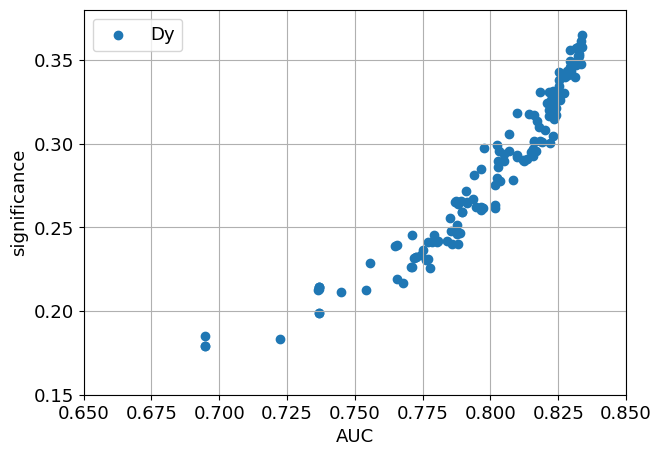

In [54]:
showCorr(cmp4)

corr coef: 0.9239989944315472
shape: 140


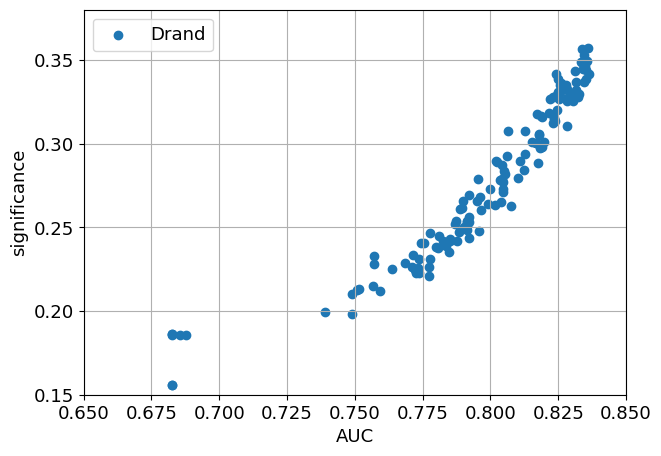

In [52]:
showCorr(cmp3)

# Signal and backgrounds

In [168]:
sigs1 = pd.read_csv("zaloha/binary_CSampledDatasetAcc/signals.csv")
sigs1 = sigs1['XGB'] 

sigs2 = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/signals.csv")
sigs2 = sigs2['XGB'] 


print('acc stats:')
print('mean:', sigs1.mean(),'std:', sigs1.std(), 'max:',sigs1.max())
print('\nexp events stats:')
print('mean:', sigs2.mean(),'std:', sigs2.std(), 'max:', sigs2.max())


(sigs2-sigs1).sum()/cmp.shape[0]

acc stats:
mean: 24.39429762703086 std: 12.235077576464645 max: 73.2

exp events stats:
mean: 25.954230485456197 std: 12.074537861450093 max: 73.2


1.6588101623448268

# Best perfomances

In [3]:
# sampled dataset to compare with
model = 'XGB'
aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, model)

In [4]:
aucs = aucs.sort_values('val', ascending = False)
aucs = aucs.rename(columns = {'val' : 'auc'})
aucs.head(7)

,nt,maxd,lr,auc
122,500,5,0.05,0.833855
114,500,3,0.1,0.833778
121,500,5,0.1,0.833333
86,200,5,0.1,0.833331
94,200,7,0.05,0.832606
129,500,7,0.05,0.832526
93,200,7,0.1,0.832303


In [88]:
# sampled dataset to compare with
model = 'GBDT'
aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, model)

In [ ]:
aucs = aucs.rename(columns = {'val' : 'auc'})
aucs.sort_values('val', ascending = False).head(10)

In [20]:
# sampled dataset to compare with
model = 'RF'
aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, model)

In [21]:
aucs.sort_values('val', ascending = False).head(10)

,nt,maxd,cr,val
135,500,15,log_loss,0.825749
134,500,15,entropy,0.825749
100,200,15,log_loss,0.824893
99,200,15,entropy,0.824893
64,100,15,entropy,0.823756
65,100,15,log_loss,0.823756
133,500,15,gini,0.822442
98,200,15,gini,0.821725
29,50,15,entropy,0.821498
30,50,15,log_loss,0.821498


# Binary vs multi classifier compare

In [ ]:
# binary classifier
model = 'ADA'
aucs = pd.read_csv("zaloha/binary_CSampledDatasetExpEvents/aucs.csv")
aucs.rename({"Unnamed: 0" : "setup"}, axis = 1, inplace = True)
aucs = getValsPars(aucs, model)

aucs = aucs.sort_values('val', ascending = False)
aucs = aucs.rename(columns = {'val' : 'val'})
binary = aucs
binary.head(10)

In [316]:
c = assignToCmp(binary, multi, False)

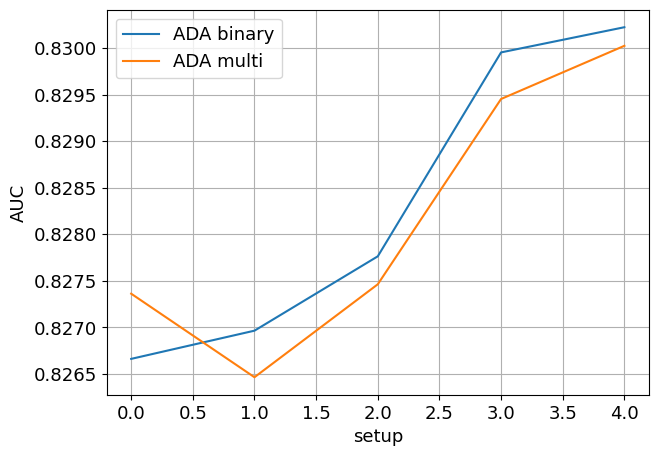

In [320]:
c = c.sort_values('val1', ascending = True)
plt.figure(figsize=(7,5))
plt.plot(range(len(c)), c['val1'], label = 'binary')
plt.plot(range(len(c)), c['val2'], label = 'multi')
plt.legend([model + ' binary',model + ' multi'])
plt.grid(True)
plt.xlabel('setup')
plt.ylabel('AUC')
plt.savefig('diplomka_obrazky/ada_m_b.png',dpi=300)
#plt.savefig('diplomka_obrazky/xgb_m_b.png',dpi=300)